<a href="https://colab.research.google.com/github/azzazhr/Machine-Learning/blob/main/Azzahra_Attaqina_JS04_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI - 3B**

**KUIS 1 MACHINE LEARNING**

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd #manipulasi dan analisis data
import numpy as np #operasi numerik & array
import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns #visualisasi data berbasis Matplotlib
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features #berisi fitur/kolom input
y = adult_income.data.targets #berisi target/label

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size (Menampilkan ukuran dataset (jumlah baris, jumlah kolom).
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1

print("Profil Data:")
# Cek ukuran data
print("Dimensi dataset:", df.shape) # Menampilkan ukuran data baris, kolom

# Lihat 5 data teratas
display(df.head())

# Informasi dataset
df.info()

# Statistik deskriptif awal (numerik)
display(df.describe())

# Cek missing value
missing_values = df.isnull().sum()
print("\nMissing values tiap kolom:\n", missing_values[missing_values > 0])


Profil Data:
Dimensi dataset: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000



Missing values tiap kolom:
 workclass         963
occupation        966
native-country    274
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2

# Imputasi missing value dengan modus (nilai terbanyak) (pakai modus karena kolomnya termasuk kategori)
for col in ["workclass", "occupation", "native-country"]:
    mode_val = df[col].mode()[0]   # cari nilai terbanyak dan mengambil nilai pertama
    df[col].fillna(mode_val, inplace=True) #mengganti semua NaN dengan nilai modus

# Cek lagi apakah masih ada missing value
print("Cek ulang missing value:")
print(df.isnull().sum())

Cek ulang missing value:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-3253070580.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True) #mengganti semua NaN dengan nilai modus


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2

# Cari semua kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
print("Fitur kategorikal:\n", categorical_cols)

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip() #menghapus spasi


    # Ganti nilai aneh atau missing value dengan 'Others'
    df[col] = df[col].replace(
        ['\\?', 'NA', 'NaN', 'nan', 'functools.cached_property at'],
        'Others',
        regex=True
    )

# Normalisasi kategori spesifik
df['native-country'] = df['native-country'].replace({
    'United-States': 'United States',
    'Trinadad&Tobago': 'Trinidad & Tobago',
    'South': 'Others'
})

df['workclass'] = df['workclass'].replace({
    'Self-emp-not-inc': 'Self-emp',
    'Self-emp-inc': 'Self-emp'
})

df['marital-status'] = df['marital-status'].replace({
    'Never-married': 'Never Married'
})

df['income'] = df['income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})

# Cek ulang hasil pembersihan
for col in categorical_cols:
    print(f"\n--- {col} setelah dibersihkan ---")
    print(df[col].value_counts(dropna=False).head(20)) #Menghitung jumlah kemunculan (frekuensi) tiap nilai/kategori pada kolom
                                                        #agar nilai yang kosong (NaN) juga dihitung (kalau ada).
                                                        #Menampilkan 20 kategori teratas

Fitur kategorikal:
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

--- workclass setelah dibersihkan ---
workclass
Private         34869
Self-emp         5557
Local-gov        3136
State-gov        1981
Others           1836
Federal-gov      1432
Without-pay        21
Never-worked       10
Name: count, dtype: int64

--- education setelah dibersihkan ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

--- marital-status setelah dibersihkan ---
marital-status
Married-civ-spouse       22379
Never Married            16117
Divorced                  6

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

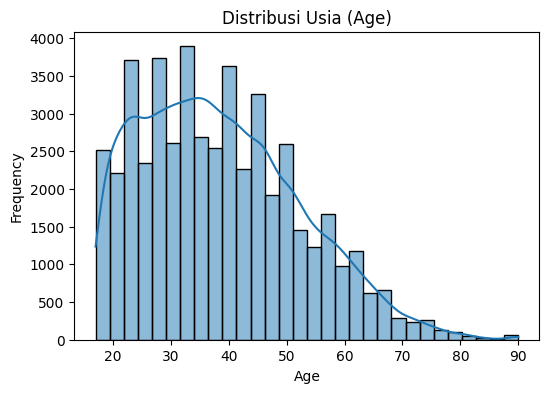

In [ ]:
# Jawab 1.1 - Histrogram
# 1. Histogram 'age'

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribusi Usia (Age)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

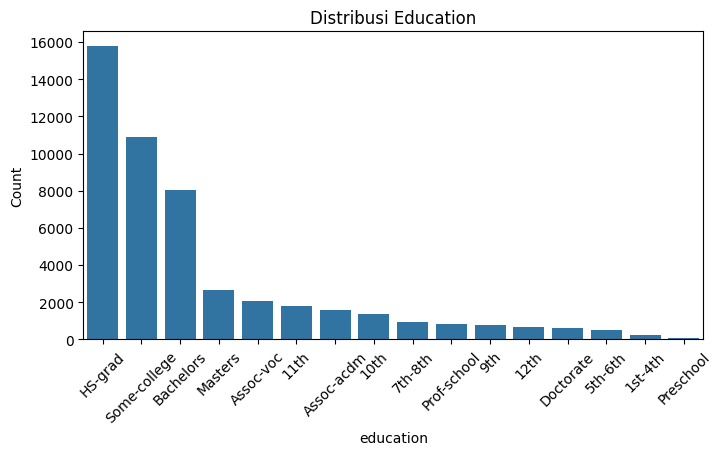

In [ ]:
# Jawab 1.2 - Barchart
# 2. Bar chart 'education'

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title("Distribusi Education")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

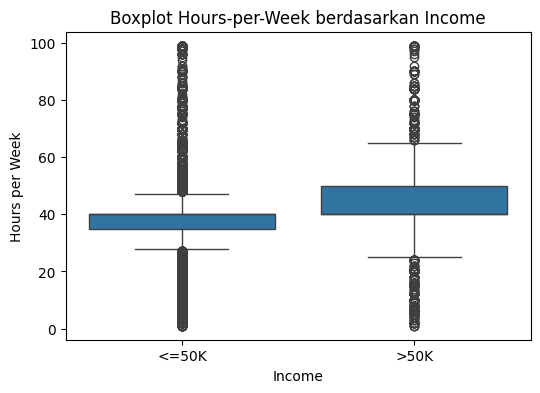

In [ ]:
# Jawab 1.3 - Boxplot
# 3. Boxplot 'income'

plt.figure(figsize=(6,4))
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.title("Boxplot Hours-per-Week berdasarkan Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

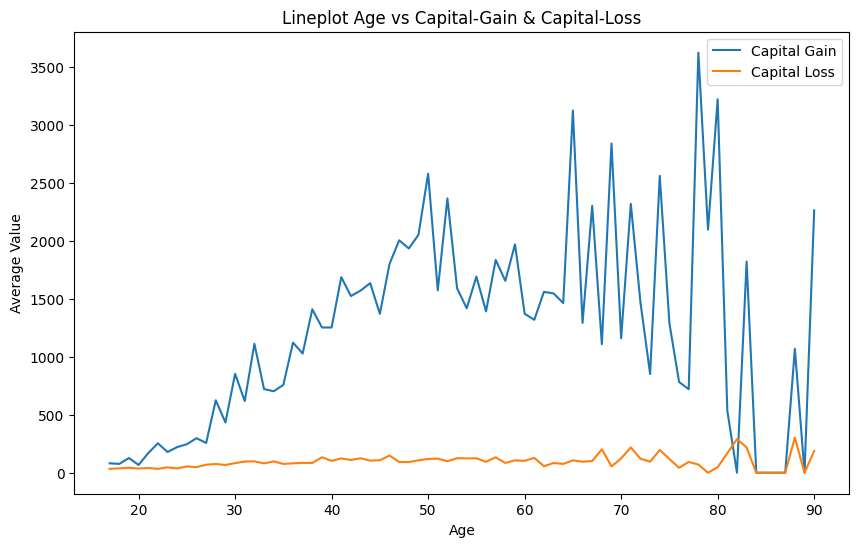

In [ ]:
# Jawab 1.4 - Lineplot
# 4. Lineplot 'hours-per-week'

# Hitung rata-rata capital-gain dan capital-loss berdasarkan age
age_grouped = df.groupby("age")[["capital-gain", "capital-loss"]].mean().reset_index()

# Plot lineplot
plt.figure(figsize=(10,6))
sns.lineplot(x="age", y="capital-gain", data=age_grouped, label="Capital Gain")
sns.lineplot(x="age", y="capital-loss", data=age_grouped, label="Capital Loss")

plt.title("Lineplot Age vs Capital-Gain & Capital-Loss")
plt.xlabel("Age")
plt.ylabel("Average Value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  1. Fenomena distribusi 'age':
   Distribusi usia miring ke kanan (positively skewed).
   Artinya sebagian besar pekerja berada pada rentang usia 20–50 tahun,
   dengan jumlah yang semakin sedikit pada usia tua (>60).
   Jadi lebih banyak pekerja usia produktif.

2. Jika terdapat data yang hilang pada variabel 'age':
   Strategi yang dipilih adalah imputasi menggunakan median.
   Alasannya karena distribusi 'age' tidak simetris (miring ke kanan),
   sehingga median lebih representatif dibanding mean
   yang sensitif terhadap outlier (usia sangat tua).

3. Jumlah outlier pada setiap kategori 'income' terkait 'hours-per-week':
   - Income <=50K : terdapat banyak outlier terutama pada jam kerja sangat tinggi (>60 jam).
   - Income >50K  : juga memiliki outlier, namun jumlahnya lebih sedikit dibanding kategori <=50K.
   Kategori dengan outlier terbanyak adalah Income <=50K,
   karena ada lebih banyak pekerja dengan jam kerja tidak normal (sangat tinggi).
'''

"\n  1. Fenomena distribusi 'age':\n   Distribusi usia miring ke kanan (positively skewed).\n   Artinya sebagian besar pekerja berada pada rentang usia 20–50 tahun,\n   dengan jumlah yang semakin sedikit pada usia tua (>60).\n   Jadi lebih banyak pekerja usia produktif.\n\n2. Jika terdapat data yang hilang pada variabel 'age':\n   Strategi yang dipilih adalah imputasi menggunakan median.\n   Alasannya karena distribusi 'age' tidak simetris (miring ke kanan),\n   sehingga median lebih representatif dibanding mean\n   yang sensitif terhadap outlier (usia sangat tua).\n\n3. Jumlah outlier pada setiap kategori 'income' terkait 'hours-per-week':\n   - Income <=50K : terdapat banyak outlier terutama pada jam kerja sangat tinggi (>60 jam).\n   - Income >50K  : juga memiliki outlier, namun jumlahnya lebih sedikit dibanding kategori <=50K.\n   Kategori dengan outlier terbanyak adalah Income <=50K,\n   karena ada lebih banyak pekerja dengan jam kerja tidak normal (sangat tinggi).\n"

In [ ]:
# Inisialisasi dictionary untuk menyimpan jumlah outlier
outlier_counts = {}

# Loop setiap kategori income
for category in df['income'].unique():
    data = df[df['income'] == category]['hours-per-week']

    # Hitung Q1, Q3, dan IQR
    Q1 = data.quantile(0.25) #25% data pertama (batas bawah).
    Q3 = data.quantile(0.75) #75% data pertama (atau 25% data terakhir tersisa).
    IQR = Q3 - Q1

    # Tentukan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_counts[category] = len(outliers)

# Tampilkan hasil
print("Jumlah outlier per kategori income:")
for cat, count in outlier_counts.items():
    print(f"{cat}: {count}")

# Menentukan kategori dengan outlier terbanyak
max_outlier_cat = max(outlier_counts, key=outlier_counts.get)
print(f"\nKategori dengan outlier terbanyak: {max_outlier_cat}")

Jumlah outlier per kategori income:
<=50K: 11706
>50K: 781

Kategori dengan outlier terbanyak: <=50K


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1

from sklearn.preprocessing import LabelEncoder
# Copy data biar aman
df_encoded = df.copy()

# Encoding kolom Sex
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0}) #mengubah nilai kategorial menjadi numerik

# Encoding kolom Income (target)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Cek hasil
df_encoded[['sex', 'income']].head()

,sex,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


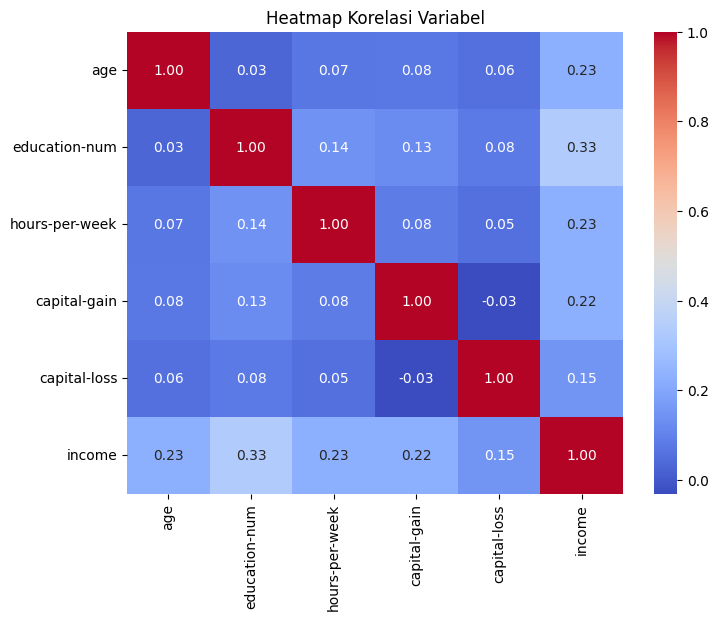

In [ ]:
# Jawab Soal 1

# Pastikan income di-encode jadi numerik
if df_encoded['income'].dtype == 'object':
    le = LabelEncoder()
    df_encoded['income'] = le.fit_transform(df_encoded['income'])
# Ambil kolom yang diminta
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
df_corr = df_encoded[cols]

# Hitung matriks korelasi (Pearson)
corr_matrix = df_corr.corr()

# Tampilkan
print("Matriks Korelasi:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel")
plt.show()


In [ ]:
# Hasil analisis jelaskan pada cell ini

'''

Hasil Analisis Korelasi:

1. Education-num memiliki korelasi positif cukup kuat dengan income.
   Artinya semakin tinggi pendidikan, semakin besar peluang berpenghasilan >50K.

2. Capital-gain sangat berkorelasi positif dengan income.
   Orang dengan capital gain cenderung lebih banyak pada income >50K.

3. Age memiliki korelasi positif lemah-sedang dengan income.
   Usia yang lebih tua sedikit meningkatkan kemungkinan berpenghasilan >50K.

4. Hours-per-week hanya memiliki korelasi sangat lemah dengan income.
   Jam kerja lebih lama tidak selalu berarti income lebih tinggi.

5. Capital-loss hampir tidak memiliki korelasi dengan income.
   Variabel ini tidak signifikan untuk membedakan pendapatan.

Kesimpulan:
Variabel paling penting untuk memprediksi income adalah
education-num dan capital-gain.Selain itu age juga berpengaruh,
sedangkan hours-per-week dan capital-loss memiliki pengaruh yang lebih kecil terhadap pendapatan.

'''

'\n\nHasil Analisis Korelasi:\n\n1. Education-num memiliki korelasi positif cukup kuat dengan income.\n   Artinya semakin tinggi pendidikan, semakin besar peluang berpenghasilan >50K.\n\n2. Capital-gain sangat berkorelasi positif dengan income.\n   Orang dengan capital gain cenderung lebih banyak pada income >50K.\n\n3. Age memiliki korelasi positif lemah-sedang dengan income.\n   Usia yang lebih tua sedikit meningkatkan kemungkinan berpenghasilan >50K.\n\n4. Hours-per-week hanya memiliki korelasi sangat lemah dengan income.\n   Jam kerja lebih lama tidak selalu berarti income lebih tinggi.\n\n5. Capital-loss hampir tidak memiliki korelasi dengan income.\n   Variabel ini tidak signifikan untuk membedakan pendapatan.\n\nKesimpulan:\nVariabel paling penting untuk memprediksi income adalah\neducation-num dan capital-gain. Age juga berpengaruh,\nsedangkan hours-per-week dan capital-loss kurang relevan.\n\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist

# Load hanya data test
(x_train, y_train), (x_test, y_test) = mnist.load_data() #x : gambar, y : label, train : training, test : testing

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


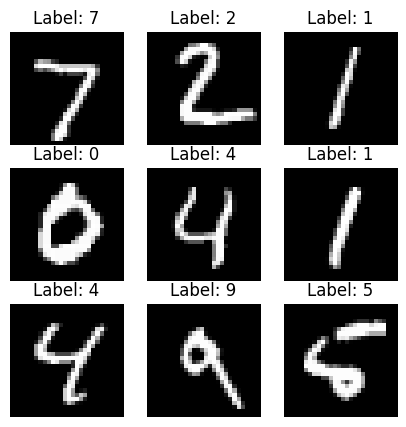

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9): #menampilkan 9 gambar pertama dari data uji (x_test).
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape data setelah upsampling: (10000, 32, 32)


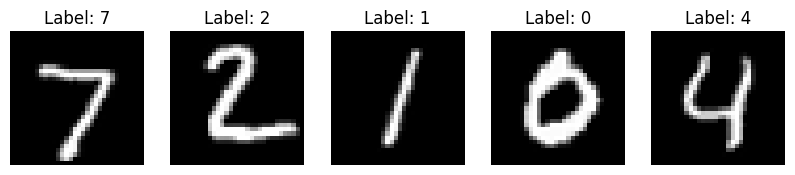

In [ ]:
# Jawab Soal 1 (Memperbesar jumlah data)

import cv2

# Ukuran baru
new_size = (32, 32)

# Buat array kosong untuk menampung hasil upsampling
x_test_resized = np.zeros((x_test.shape[0], 32, 32))

# Lakukan resize untuk setiap gambar di X_test
for i in range(len(x_test)):
    x_test_resized[i] = cv2.resize(x_test[i], new_size, interpolation=cv2.INTER_CUBIC)

# Cek shape baru
print("Shape data setelah upsampling:", x_test_resized.shape)

# Tampilkan 5 sampel hasil upsampling
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai minimum: 0.0
Nilai maksimum: 1.0


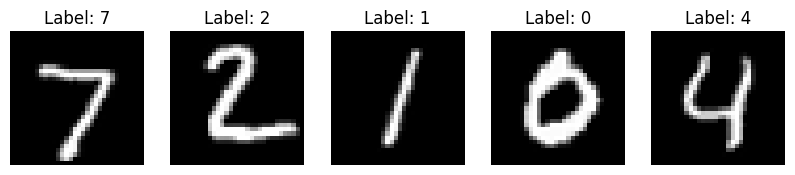

In [ ]:
# Jawab Soal 2

# Normalisasi nilai piksel (0-255) ke rentang 0-1
x_test_normalized = x_test_resized / 255.0

# Cek nilai min dan max setelah normalisasi
print("Nilai minimum:", x_test_normalized.min())
print("Nilai maksimum:", x_test_normalized.max())

# Tampilkan contoh hasil normalisasi (5 data)
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_normalized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3

# Holder array kosong untuk hasil yang sudah di resize dan normalisasi
data_test_flattened = []

# Loop setiap citra di x_test_normalized
for img in x_test_normalized:
    # Ubah matriks 2D (atau 3D kalau RGB) menjadi 1D
    flat = img.flatten() #mengubah array multidimensi menjadi 1 dimensi.
    data_test_flattened.append(flat)

# Ubah ke numpy array (opsional, lebih rapi)
data_test_flattened = np.array(data_test_flattened) #Mengubah list Python biasa menjadi numpy array.

print("Shape hasil resize dan normalisasi:", data_test_flattened.shape)

Shape hasil resize dan normalisasi: (10000, 1024)
